In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import scale

In [2]:
sns.set(style="whitegrid")
sns.set_color_codes("muted")
# vgsales = pd.read_csv('vgsales.csv', na_values='.').dropna()
# vgsales['Year'] = vgsales['Year'].astype('int')

## Data Extraction
This is a scrape of the website vgchartz as of Apr 12, 2019 and published by **Abdulshaheed Alqunber** in Kaggle. This dataset contain 55,792 records with over 10 features. In this project we only use 8 features to analysis.

**Purpose of analysis:**

- We hope to understand the current video game situation through the analysis of the data, and provide decision support for increased sales.

- Find out the best sales area for video games, And targeted precision marketing through user purchase characteristics, Promote sales of video game products. 

In [3]:
vgsales = pd.read_csv('vgsales.csv', na_values='.')

## Data Cleanup

This dataset contains a lot of missing values, but if we remove all incomplete records, the remaining data will become very small. Therefore, we only extract the data do not have missing value in our interested features for each problem.

In [4]:
vgsales_year = vgsales[pd.notnull(vgsales['Year'])]

In [5]:
vgsales_year

Name         Genre Platform         Publisher  \
0                         Wii Sports        Sports      Wii          Nintendo   
1                  Super Mario Bros.      Platform      NES          Nintendo   
2                     Mario Kart Wii        Racing      Wii          Nintendo   
3      PlayerUnknown's Battlegrounds       Shooter       PC  PUBG Corporation   
4                  Wii Sports Resort        Sports      Wii          Nintendo   
...                              ...           ...      ...               ...   
55786          In the Valley of Gods     Adventure       PC      Campo Santo    
55787                    Indivisible  Role-Playing       PC         505 Games   
55788                     Lost Ember     Adventure       PC   Mooneye Studios   
55789                     Lost Ember     Adventure      PS4   Mooneye Studios   
55790                     Lost Ember     Adventure     XOne   Mooneye Studios   

              Developer  Critic_Score  Global_Sales  NA_Sales  PAL_Sales  \
0          Nintendo EAD           7.7           NaN       NaN        NaN   
1          Nintendo EAD          10.0           NaN       NaN        NaN   
2          Nintendo EAD           8.2           NaN       NaN        NaN   
3      PUBG Corporation           NaN           NaN       NaN        NaN   
4          Nintendo EAD           8.0           NaN       NaN        NaN   
...                 ...           ...           ...       ...        ...   
55786      Campo Santo            NaN           NaN       NaN        NaN   
55787    Lab Zero Games           NaN           NaN       NaN        NaN   
55788   Mooneye Studios           NaN           NaN       NaN        NaN   
55789   Mooneye Studios           NaN           NaN       NaN        NaN   
55790   Mooneye Studios           NaN           NaN       NaN        NaN   

       JP_Sales  Other_Sales    Year  
0           NaN          NaN  2006.0  
1           NaN          NaN  1985.0  
2           NaN          NaN  2008.0  
3           NaN          NaN  2017.0  
4           NaN          NaN  2009.0  
...         ...          ...     ...  
55786       NaN          NaN  2019.0  
55787       NaN          NaN  2019.0  
55788       NaN          NaN  2019.0  
55789       NaN          NaN  2019.0  
55790       NaN          NaN  2019.0  

[54813 rows x 12 columns]

**Global Sale Top 50 Games**

In [67]:
df = vgsales[pd.notnull(vgsales['Global_Sales'])]
vgsales_order_by_Global_Sales = df.sort_values('Global_Sales', inplace=False, ascending=False)
vgsales_order_by_Global_Sales_50 = vgsales_order_by_Global_Sales[0:50]
vgsales_order_by_Global_Sales_50 = vgsales_order_by_Global_Sales_50.drop_duplicates(['Name'],keep='first')
vgsales_order_by_Global_Sales_50.head(10)

Name             Genre Platform       Publisher  \
19              Grand Theft Auto V            Action      PS3  Rockstar Games   
30     Grand Theft Auto: Vice City            Action      PS2  Rockstar Games   
34       Call of Duty: Black Ops 3           Shooter      PS4      Activision   
40  Call of Duty: Modern Warfare 3           Shooter     X360      Activision   
41         Call of Duty: Black Ops           Shooter     X360      Activision   
45           Red Dead Redemption 2  Action-Adventure      PS4  Rockstar Games   
46      Call of Duty: Black Ops II           Shooter     X360      Activision   
49  Call of Duty: Modern Warfare 2           Shooter     X360      Activision   
50              Call of Duty: WWII           Shooter      PS4      Activision   
53            Grand Theft Auto III            Action      PS2  Rockstar Games   

             Developer  Critic_Score  Global_Sales  NA_Sales  PAL_Sales  \
19      Rockstar North           9.4         20.32      6.37       9.85   
30      Rockstar North           9.6         16.15      8.41       5.49   
34            Treyarch           NaN         15.09      6.18       6.05   
40       Infinity Ward           8.7         14.82      9.07       4.29   
41            Treyarch           8.8         14.74      9.76       3.73   
45      Rockstar Games           9.8         13.94      5.26       6.21   
46            Treyarch           NaN         13.86      8.27       4.32   
49       Infinity Ward           9.5         13.53      8.54       3.63   
50  Sledgehammer Games           8.0         13.40      4.67       6.21   
53          DMA Design           9.5         13.10      6.99       4.51   

    JP_Sales  Other_Sales    Year  
19      0.99         3.12  2013.0  
30      0.47         1.78  2002.0  
34      0.41         2.44  2015.0  
40      0.13         1.33  2011.0  
41      0.11         1.14  2010.0  
45      0.21         2.26  2018.0  
46      0.07         1.20  2012.0  
49      0.08         1.28  2009.0  
50      0.40         2.12  2017.0  
53      0.30         1.30  2001.0

Text(0, 0.5, 'Games')

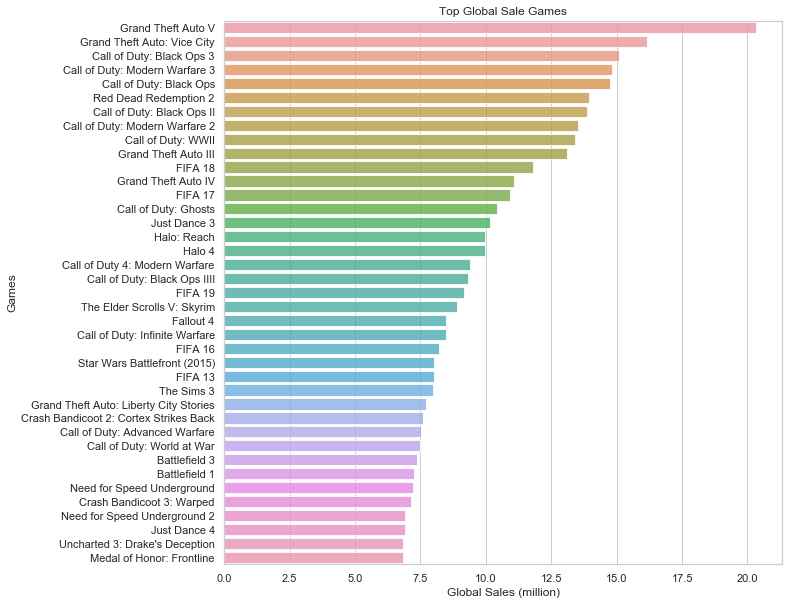

In [69]:
f, ax=plt.subplots(figsize=(10,10))
ax = sns.barplot(y='Name', x= 'Global_Sales', data = vgsales_order_by_Global_Sales_50,
            orient='h', alpha=0.8).set_title('Top Global Sale Games')
plt.xlabel('Global Sales (million)')
plt.ylabel('Games')

**Global Top Genres of 100 Games**

Text(0, 0.5, 'Genres')

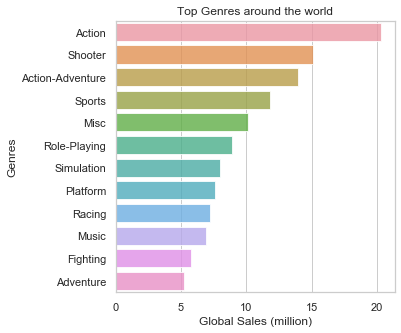

In [70]:
df = vgsales[pd.notnull(vgsales['Global_Sales'])&pd.notnull(vgsales['Genre'])]
vgsales_order_by_Global_Genre = df.sort_values('Global_Sales', inplace=False, ascending=False)
vgsales_order_by_Global_Genre = vgsales_order_by_Global_Sales[0:100]
vgsales_order_by_Global_Genre = vgsales_order_by_Global_Genre.drop_duplicates(['Genre'],keep='first')
# vgsales_order_by_Global_Sales_50.head(10)
f, ax=plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.barplot(y='Genre', x= 'Global_Sales', data = vgsales_order_by_Global_Genre,
            orient='h', alpha=0.8).set_title('Top Genres around the world')
plt.xlabel('Global Sales (million)')
plt.ylabel('Genres')

### Findings :


- **Which is the best global selling game?**

Grand Theft Auto V, Grand Theft Auto: Vice City and Call of Duty are three best seller games around the world.


- **What kind of games are they?**

Action, shooter and action-adventure are three favourite genres by players.

## Japan

**Japan Sale Top 10**

In [12]:
df = vgsales[pd.notnull(vgsales['JP_Sales'])]
vgsales_order_by_JP_Sales = vgsales.sort_values('JP_Sales', inplace=False, ascending=False)
vgsales_order_by_JP_Sales.head(10)

Name         Genre Platform  \
582   Yokai Watch 2: Psychic Specters  Role-Playing      3DS   
897         Yu-Gi-Oh: Duel Monsters 4  Role-Playing       GB   
284             Monster Hunter: World        Action      PS4   
715                    Hot Shots Golf        Sports       PS   
635                    Hot Shots Golf        Sports       PS   
978       Famista '89 - Kaimaku Han!!        Sports      NES   
881                   R.B.I. Baseball        Sports      NES   
943                    Derby Stallion        Sports       PS   
216                Final Fantasy XIII  Role-Playing      PS3   
1134                  Dragon Quest XI  Role-Playing      3DS   

                        Publisher                  Developer  Critic_Score  \
582                      Nintendo                    Level 5           NaN   
897                        Konami                     Konami           NaN   
284                        Capcom                     Capcom           9.3   
715   Sony Computer Entertainment  Camelot Software Planning           NaN   
635   Sony Computer Entertainment  Camelot Software Planning           NaN   
978                         Namco                      Namco           NaN   
881                        Tengen                      Namco           NaN   
943           ASCII Entertainment                  ParityBit           NaN   
216                   Square Enix                Square Enix           8.0   
1134                  Square Enix                Square Enix           NaN   

      Global_Sales  NA_Sales  PAL_Sales  JP_Sales  Other_Sales    Year  
582           2.95      0.12       0.12      2.69         0.02  2017.0  
897           2.18       NaN        NaN      2.17         0.01  2000.0  
284           4.67      1.03       1.06      2.17         0.42  2018.0  
715           2.56      0.26       0.17      2.13          NaN  1998.0  
635           2.79      0.29       0.20      2.13         0.18  1998.0  
978           2.05       NaN        NaN      2.05          NaN  1989.0  
881           2.20      0.15        NaN      2.05          NaN  1988.0  
943           2.09       NaN        NaN      1.96         0.14  1997.0  
216           5.35      1.75       1.23      1.87         0.51  2010.0  
1134          1.82       NaN        NaN      1.82          NaN  2017.0

**Top genres of 100 favourite games in Japan**

Text(0, 0.5, 'Genres')

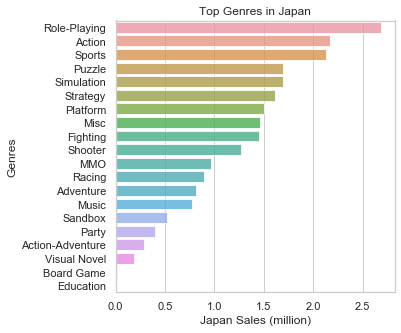

In [72]:
df = vgsales_order_by_JP_Sales[0:100]
vgsales_order_by_Japan_Genre = df.sort_values('Global_Sales', inplace=False, ascending=False)
vgsales_order_by_Japan_Genre = vgsales_order_by_JP_Sales
vgsales_order_by_Japan_Genre = vgsales_order_by_JP_Sales.drop_duplicates(['Genre'],keep='first')
f, ax=plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.barplot(y='Genre', x= 'JP_Sales', data = vgsales_order_by_Japan_Genre,
            orient='h', alpha=0.8).set_title('Top Genres in Japan')
plt.xlabel('Japan Sales (million)')
plt.ylabel('Genres')

## North America

**North America Sale Top 10**

In [14]:
df = vgsales[pd.notnull(vgsales['NA_Sales'])]
vgsales_order_by_NA_Sales = vgsales.sort_values('NA_Sales', inplace=False, ascending=False)
vgsales_order_by_NA_Sales.head(10)

Name    Genre Platform               Publisher  \
41         Call of Duty: Black Ops  Shooter     X360              Activision   
40  Call of Duty: Modern Warfare 3  Shooter     X360              Activision   
32              Grand Theft Auto V   Action     X360          Rockstar Games   
49  Call of Duty: Modern Warfare 2  Shooter     X360              Activision   
30     Grand Theft Auto: Vice City   Action      PS2          Rockstar Games   
46      Call of Duty: Black Ops II  Shooter     X360              Activision   
87                     Halo: Reach  Shooter     X360  Microsoft Game Studios   
53            Grand Theft Auto III   Action      PS2          Rockstar Games   
73             Grand Theft Auto IV   Action     X360          Rockstar Games   
81            Call of Duty: Ghosts  Shooter     X360              Activision   

         Developer  Critic_Score  Global_Sales  NA_Sales  PAL_Sales  JP_Sales  \
41        Treyarch           8.8         14.74      9.76       3.73      0.11   
40   Infinity Ward           8.7         14.82      9.07       4.29      0.13   
32  Rockstar North           NaN         15.86      9.06       5.33      0.06   
49   Infinity Ward           9.5         13.53      8.54       3.63      0.08   
30  Rockstar North           9.6         16.15      8.41       5.49      0.47   
46        Treyarch           NaN         13.86      8.27       4.32      0.07   
87          Bungie           9.3          9.97      7.08       2.01      0.08   
53      DMA Design           9.5         13.10      6.99       4.51      0.30   
73  Rockstar North          10.0         11.09      6.80       3.11      0.14   
81   Infinity Ward           6.9         10.41      6.76       2.64      0.04   

    Other_Sales    Year  
41         1.14  2010.0  
40         1.33  2011.0  
32         1.42  2013.0  
49         1.28  2009.0  
30         1.78  2002.0  
46         1.20  2012.0  
87         0.80  2010.0  
53         1.30  2001.0  
73         1.04  2008.0  
81         0.98  2013.0

**Top genres of 100 favourite games in North America**

Text(0, 0.5, 'Genres')

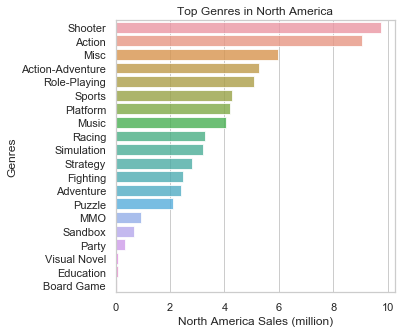

In [71]:
df = vgsales_order_by_NA_Sales[0:100]
vgsales_order_by_NA_Genre = df.sort_values('NA_Sales', inplace=False, ascending=False)
vgsales_order_by_NA_Genre = vgsales_order_by_NA_Sales
vgsales_order_by_NA_Genre = vgsales_order_by_NA_Sales.drop_duplicates(['Genre'],keep='first')
f, ax=plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.barplot(y='Genre', x= 'NA_Sales', data = vgsales_order_by_NA_Genre,
            orient='h', alpha=0.8).set_title('Top Genres in North America')
plt.xlabel('North America Sales (million)')
plt.ylabel('Genres')

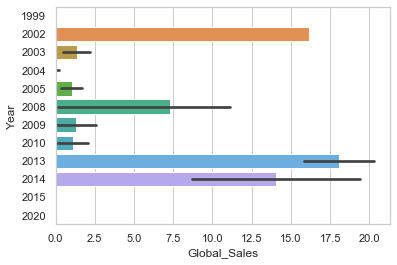

In [16]:
df = vgsales[pd.notnull(vgsales['Developer'])&pd.notnull(vgsales['Year'])].copy()
df['Year'] = df['Year'].astype('int')
Rockstar_North_historical_sales = df[df.Developer.isin(["Rockstar North"])]
ax = sns.barplot(x="Global_Sales", y="Year", orient="h", alpha=1, data=Rockstar_North_historical_sales)

## Europe

**Europe Sale Top 10**

In [17]:
df = vgsales[pd.notnull(vgsales['PAL_Sales'])]
vgsales_order_by_PAL_Sales = vgsales.sort_values('PAL_Sales', inplace=False, ascending=False)
vgsales_order_by_PAL_Sales.head(10)

Name             Genre Platform        Publisher  \
19           Grand Theft Auto V            Action      PS3   Rockstar Games   
20           Grand Theft Auto V            Action      PS4   Rockstar Games   
68                      FIFA 18            Sports      PS4        EA Sports   
76                      FIFA 17            Sports      PS4  Electronic Arts   
100                     FIFA 19            Sports      PS4  Electronic Arts   
123                  The Sims 3        Simulation       PC  Electronic Arts   
50           Call of Duty: WWII           Shooter      PS4       Activision   
45        Red Dead Redemption 2  Action-Adventure      PS4   Rockstar Games   
34    Call of Duty: Black Ops 3           Shooter      PS4       Activision   
47   Call of Duty: Black Ops II           Shooter      PS3       Activision   

              Developer  Critic_Score  Global_Sales  NA_Sales  PAL_Sales  \
19       Rockstar North           9.4         20.32      6.37       9.85   
20       Rockstar North           9.7         19.39      6.06       9.71   
68         EA Vancouver           8.3         11.80      1.27       8.64   
76            EA Canada           8.9         10.94      1.26       7.95   
100           EA Sports           NaN          9.15      0.84       6.87   
123   EA Redwood Shores           8.5          7.96      1.01       6.46   
50   Sledgehammer Games           8.0         13.40      4.67       6.21   
45       Rockstar Games           9.8         13.94      5.26       6.21   
34             Treyarch           NaN         15.09      6.18       6.05   
47             Treyarch           NaN         13.80      4.99       5.88   

     JP_Sales  Other_Sales    Year  
19       0.99         3.12  2013.0  
20       0.60         3.02  2014.0  
68       0.15         1.73  2017.0  
76       0.12         1.61  2016.0  
100      0.10         1.34  2018.0  
123       NaN         0.50  2009.0  
50       0.40         2.12  2017.0  
45       0.21         2.26  2018.0  
34       0.41         2.44  2015.0  
47       0.65         2.28  2012.0

**Top genres of 100 favourite games in Europe**

Text(0, 0.5, 'Genres')

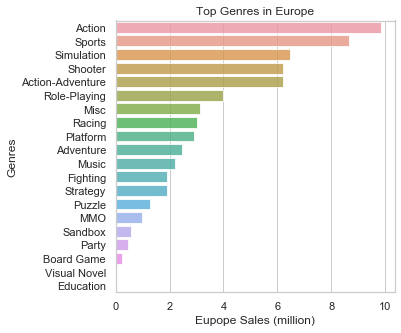

In [73]:
df = vgsales_order_by_PAL_Sales[0:100]
vgsales_order_by_PAL_Genre = df.sort_values('PAL_Sales', inplace=False, ascending=False)
vgsales_order_by_PAL_Genre = vgsales_order_by_PAL_Sales
vgsales_order_by_PAL_Genre = vgsales_order_by_PAL_Sales.drop_duplicates(['Genre'],keep='first')
f, ax=plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.barplot(y='Genre', x= 'PAL_Sales', data = vgsales_order_by_PAL_Genre,
            orient='h', alpha=0.8).set_title('Top Genres in Europe')
plt.xlabel('Eupope Sales (million)')
plt.ylabel('Genres')

**Top 10 Publisher**

In [19]:
df = vgsales[pd.notnull(vgsales['Publisher'])]
vgsales_order_by_Publisher = df.Publisher.value_counts()
vgsales_order_by_Publisher_20 = vgsales_order_by_Publisher[0:19]
vgsales_order_by_Publisher_20['Others'] = sum(vgsales_order_by_Publisher) - sum(vgsales_order_by_Publisher_20)
vgsales_order_by_Publisher_20.head(20)

Unknown                         4891
Sega                            2085
Ubisoft                         1519
Activision                      1519
Electronic Arts                 1498
Konami                          1495
Sony Computer Entertainment     1354
Nintendo                        1351
Microsoft                       1267
THQ                             1065
Capcom                           964
Atari                            828
EA Sports                        757
Square Enix                      576
Bandai                           566
Namco Bandai                     554
Acclaim Entertainment            511
Hudson Soft                      460
Namco Bandai Games               452
Others                         32080
Name: Publisher, dtype: int64

In [20]:
vgsales_order_by_Publisher_20 = pd.DataFrame({'Publisher':vgsales_order_by_Publisher_20.index,
                                        'Count':vgsales_order_by_Publisher_20.values})

Text(0, 0.5, 'Companies')

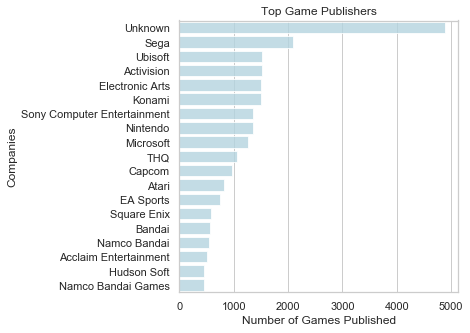

In [21]:
vgsales_order_by_Publisher_20.sort_values('Count', inplace=True, ascending=False)
f, ax=plt.subplots(figsize=(5,5))
sns.barplot(y='Publisher', x= 'Count', data = vgsales_order_by_Publisher_20[1:20],
            orient='h', alpha=0.8, color='lightblue').set_title('Top Game Publishers')
plt.xlabel('Number of Games Published')
plt.ylabel('Companies')

**From 2010-2019, the number of video games in each top 10 Publishers**

In [22]:
df = vgsales[pd.notnull(vgsales['Publisher'])&pd.notnull(vgsales['Year'])].copy()
df['Year'] = df['Year'].astype('int')

In [23]:
vgsales_order_by_Publisher_list_10 = vgsales_order_by_Publisher_20.Publisher.to_list()[2:12]

In [24]:
vgsales_Publiser_2010_2019 = df[(df['Year']>=2010)&(df['Publisher'].isin(vgsales_order_by_Publisher_list_10))&(df['Year']<2019)]

Text(0.5, 1.0, 'the number of video games published by each publisher from 2010 to 2020')

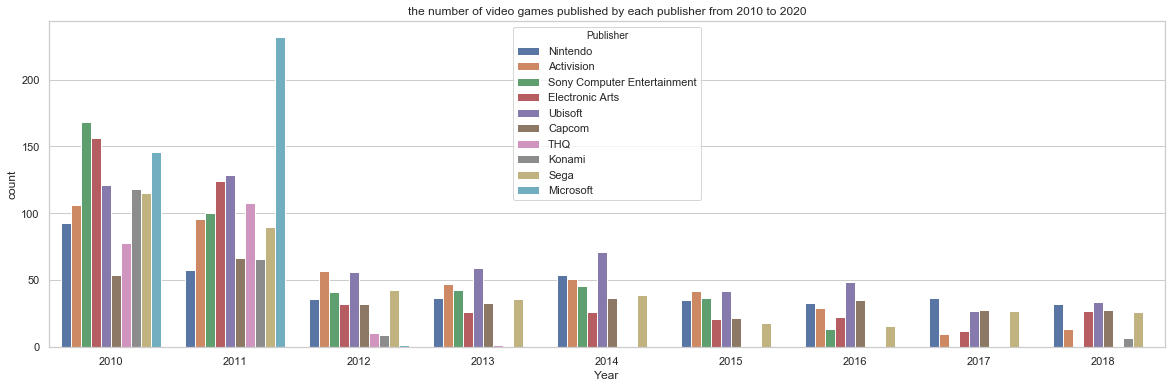

In [75]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', hue='Publisher', data=vgsales_Publiser_2010_2019).set_title('the number of video games published by each publisher from 2010 to 2020')

In [84]:
vgsales_Publiser_2010_2019[(vgsales_Publiser_2010_2019['Year']==2011)&(vgsales_Publiser_2010_2019['Publisher']=='Microsoft')]

Name    Genre Platform  Publisher  \
988                              Dance Central 2    Music     X360  Microsoft   
16846  Triple Pack: Xbox Live Arcade Compilation     Misc     X360  Microsoft   
21411                         27 Ball Funky Pool   Sports      XBL  Microsoft   
21413                              2D Math Panic     Misc      XBL  Microsoft   
21496                           4 Moku Narabe 3D     Misc      XBL  Microsoft   
...                                          ...      ...      ...        ...   
52448                           Zombie Death Car   Action      XBL  Microsoft   
52468                       Zombie Poker Defense  Shooter      XBL  Microsoft   
52470                              Zombie Racers   Action      XBL  Microsoft   
52489                       Zombies Hate Aliens!  Shooter      XBL  Microsoft   
52492                      Zombies Ruined My Day   Action      XBL  Microsoft   

                    Developer  Critic_Score  Global_Sales  NA_Sales  \
988    Harmonix Music Systems           8.6          2.04      1.45   
16846                 Various           NaN          0.03      0.03   
21411               Maximinus           NaN           NaN       NaN   
21413          OnekSoft Games           NaN           NaN       NaN   
21496                    okui           NaN           NaN       NaN   
...                       ...           ...           ...       ...   
52448                    rmm5           NaN           NaN       NaN   
52468               MindsEdge           NaN           NaN       NaN   
52470     Big Head Games Ltd.           NaN           NaN       NaN   
52489      Media Acrobats LLC           NaN           NaN       NaN   
52492                 mancebo           NaN           NaN       NaN   

       PAL_Sales  JP_Sales  Other_Sales  Year  
988         0.41      0.01         0.16  2011  
16846        NaN       NaN         0.00  2011  
21411        NaN       NaN          NaN  2011  
21413        NaN       NaN          NaN  2011  
21496        NaN       NaN          NaN  2011  
...          ...       ...          ...   ...  
52448        NaN       NaN          NaN  2011  
52468        NaN       NaN          NaN  2011  
52470        NaN       NaN          NaN  2011  
52489        NaN       NaN          NaN  2011  
52492        NaN       NaN          NaN  2011  

[232 rows x 12 columns]

**Total Top 10 Platform (From 1989 to 2018)**

In [26]:
df = vgsales[pd.notnull(vgsales['Publisher'])]
vgsales_order_by_Platform = df.Platform.value_counts()

**New Game Published in each Platform in 2018**

In [27]:
df = vgsales[pd.notnull(vgsales['Publisher'])&pd.notnull(vgsales['Year'])]
vgsales_order_by_Platform_2018 = df[df['Year']==2018].Platform.value_counts()
vgsales_order_by_Platform_2018 = pd.DataFrame({
    'Publisher':vgsales_order_by_Platform_2018.index,
    'Count':vgsales_order_by_Platform_2018.values
})

Text(0.5, 1.0, 'The number of games Published in 2018')

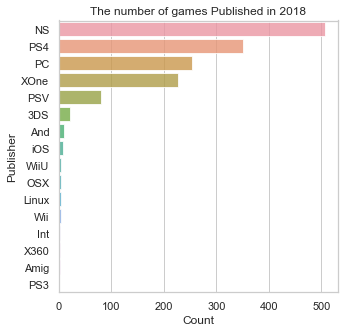

In [28]:
vgsales_order_by_Platform_2018.sort_values('Count', inplace=True, ascending=False)
f, ax=plt.subplots(figsize=(5,5))
sns.barplot(y='Publisher', x= 'Count', data = vgsales_order_by_Platform_2018,
            orient='h', alpha=0.8).set_title('The number of games Published in 2018')

In [29]:
vgsales_order_by_Platform_list_10 = vgsales_order_by_Platform.index.tolist()[0:10]

**From 2010-2019, the number of video games in each top 10 platforms**

In [30]:
df = vgsales[pd.notnull(vgsales['Platform'])&pd.notnull(vgsales['Year'])].copy()
df['Year'] = df['Year'].astype('int')
vgsales_Platform_2010_2019 = df[(df['Year']>=2010)&(df['Platform'].isin(vgsales_order_by_Platform_list_10))]

Text(0.5, 1.0, 'the number of video games published in each platform from 2010 to 2020')

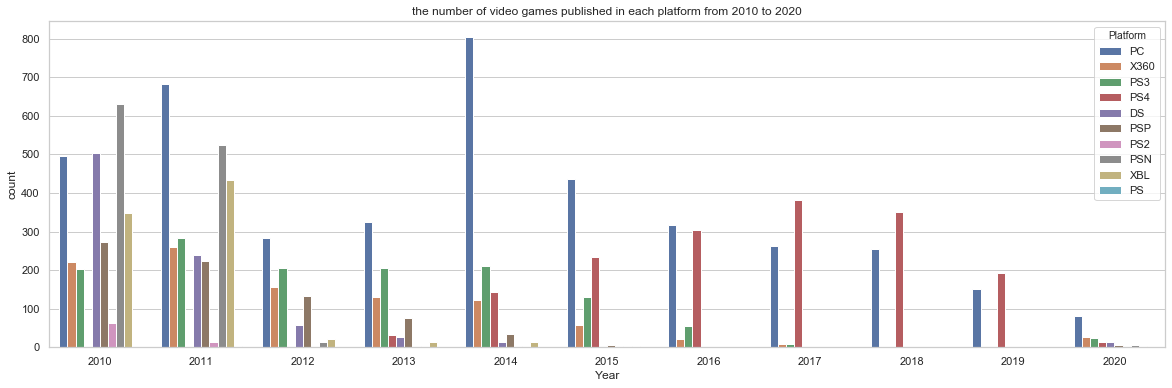

In [31]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', hue='Platform', data=vgsales_Platform_2010_2019).set_title('the number of video games published in each platform from 2010 to 2020')

**Recent favourite Platform:**

NS, PS4, PC, XOne, PSV

In [49]:
df = vgsales[pd.notnull(vgsales['Platform'])&pd.notnull(vgsales['Year'])].copy()
df['Year'] = df['Year'].astype('int') 

In [63]:
vgsales_order_by_Platform_2018_0_5 = vgsales_order_by_Platform_2018[0:5].Publisher.to_list()
vgsales_Platform_rescent = df[(df['Year']>=2010)&(df['Platform'].isin(vgsales_order_by_Platform_2018_0_5))]

Text(0.5, 1.0, 'the number of video games published in 5 top platform from 2010 to 2020')

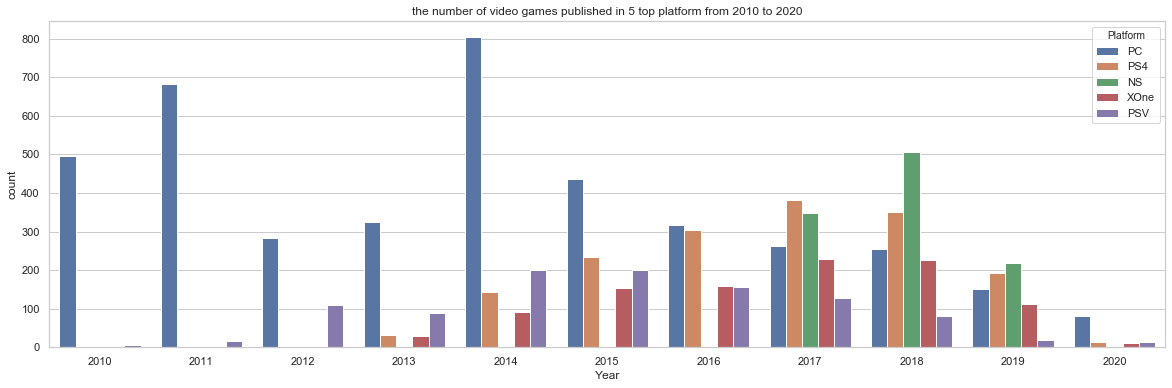

In [64]:
vgsales_Platform_2010_2019 = df[(df['Year']>=2017)&(df['Platform'].isin(vgsales_order_by_Platform_2018[0:5]))]
plt.figure(figsize=(20, 6))
sns.countplot(x='Year', hue='Platform', data=vgsales_Platform_rescent).set_title('the number of video games published in 5 top platform from 2010 to 2020')

**PC, XOne, PS4**

In [36]:
df = vgsales[pd.notnull(vgsales['Platform'])&pd.notnull(vgsales['Year'])].copy()
df['Year'] = df['Year'].astype('int')

df_PC = df[df.Platform=='PC']
df_PC = df_PC.Year.value_counts()

df_PS4 = df[df.Platform=='PS4']
df_PS4 = df_PS4.Year.value_counts()

df_XOne = df[df.Platform=='XOne']
df_XOne = df_XOne.Year.value_counts()

In [37]:
df_PC = pd.DataFrame({'Type': 'PC',
                      'Year':df_PC.index,
                      'Count':df_PC.values})
df = df_PC
df_XOne = pd.DataFrame({'Type': 'XOne',
                      'Year':df_XOne.index,
                      'Count':df_XOne.values})
df = df.append(df_XOne)

df_PS4 = pd.DataFrame({'Type': 'PS4',
                      'Year':df_PS4.index,
                      'Count':df_PS4.values})
df = df.append(df_PS4)
# df_NS = pd.DataFrame({'Type': 'NS',
#                       'Year':df_NS.index,
#                       'Count':df_NS.values})
# df = df.append(df_NS)

In [38]:
df_new = df[(df['Year']>=2010)&(df['Year']<=2018)]

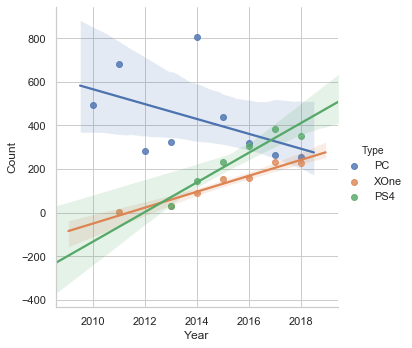

In [39]:
sns.lmplot(x="Year", y="Count", hue="Type", data=df_new)

**PC**

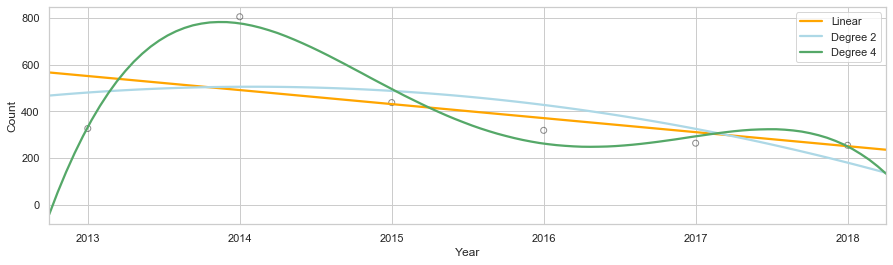

In [40]:
df_PC = df_PC[(df_PC['Year']>=2013)&(df_PC['Year']<2019)]
plt.figure(figsize=(15, 4))
plt.scatter(df_PC.Year, df_PC.Count, facecolors='None',edgecolors='k',alpha=.5)
sns.regplot(df_PC.Year, df_PC.Count, ci = None, label = 'Linear', scatter = False, color = 'orange')
sns.regplot(df_PC.Year, df_PC.Count, ci = None, label = 'Degree 2', order = 2, scatter = False, color='lightblue')
sns.regplot(df_PC.Year, df_PC.Count, ci=None, label='Degree 4', order=4, scatter=False, color='g')
plt.legend()

**PS4**

(2014, 2019)

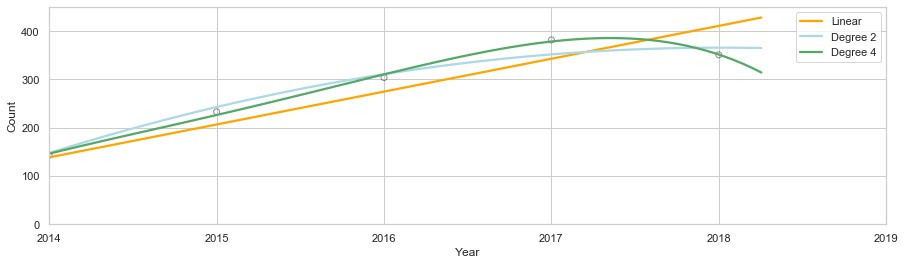

In [41]:
df_PS4 = df_PS4[(df_PS4['Year']>=2013)&(df_PS4['Year']<2019)]
plt.figure(figsize=(15, 4))
plt.scatter(df_PS4.Year, df_PS4.Count, facecolors='None',edgecolors='k',alpha=.5)
ax = sns.regplot(df_PS4.Year, df_PS4.Count, ci = None, label = 'Linear', scatter = False, color = 'orange')
sns.regplot(df_PS4.Year, df_PS4.Count, ci = None, label = 'Degree 2', order = 2, scatter = False, color='lightblue')
sns.regplot(df_PS4.Year, df_PS4.Count, ci=None, label='Degree 4', order=4, scatter=False, color='g')
plt.legend()
plt.ylim(0,)
plt.xlim(2014,2019)

**XOne**

(2013, 2019)

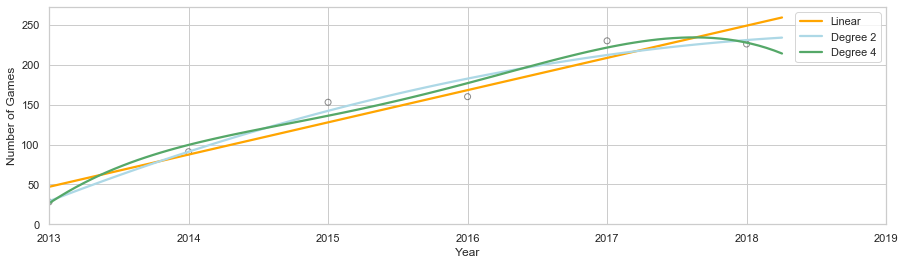

In [42]:
df_XOne = df_XOne[(df_XOne['Year']>=2013)&(df_XOne['Year']<2019)]
plt.figure(figsize=(15, 4))
plt.scatter(df_XOne.Year, df_XOne.Count, facecolors='None',edgecolors='k',alpha=.5)
ax = sns.regplot(df_XOne.Year, df_XOne.Count, ci = None, label = 'Linear', scatter = False, color = 'orange')
ax = sns.regplot(df_XOne.Year, df_XOne.Count, ci = None, label = 'Degree 2', order = 2, scatter = False, color='lightblue')
ax = sns.regplot(df_XOne.Year, df_XOne.Count, ci=None, label='Degree 4', order=4, scatter=False, color='g')
ax.set(xlabel='Year', ylabel='Number of Games')
plt.legend()
plt.ylim(0,)
plt.xlim(2013,2019)

**PC Vs XOne vs PS4**

(2013, 2019)

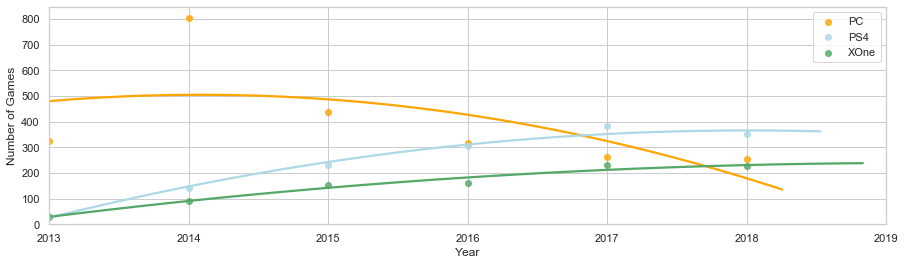

In [43]:
plt.figure(figsize=(15, 4))
ax = sns.regplot(df_PC.Year, df_PC.Count, ci = None, label = 'PC', order = 2, scatter = True, color='orange')
ax = sns.regplot(df_PS4.Year, df_PS4.Count, ci = None, label = 'PS4', order = 2, scatter = True, color='lightblue')
ax = sns.regplot(df_XOne.Year, df_XOne.Count, ci = None, label = 'XOne', order = 2, scatter = True, color='g')
plt.legend()
plt.ylim(0,)
ax.set(xlabel='Year', ylabel='Number of Games')
plt.xlim(2013,2019)

**using the number of games published in year of 2013-2018 to predict numbers of games will publish in each platform in 2019**

In [44]:
df_PC = df_PC.sort_values('Year', inplace=False, ascending=True).copy()
df_PS4 = df_PS4.sort_values('Year', inplace=False, ascending=True).copy()
df_XOne = df_XOne.sort_values('Year', inplace=False, ascending=True).copy()

In [45]:
data = pd.DataFrame({'PS4':df_PS4.Count.to_list(),
       'XOne':df_XOne.Count.to_list(),
       'PC':df_PC.Count.to_list(),
       'Year':[2013,2014,2015,2016,2017,2018]})

**PS4**

In [46]:
lm = linear_model.LinearRegression()
X = data[['Year']]
y = data['PS4']
model = lm.fit(X,y)
# print(model.intercept_,model.coef_)
predict_PS4 = model.predict([[2019]])
print("Predict around %d games will publish in PS4"%predict_PS4)

Predict around 479 games will publish in PS4


**PC**

In [47]:
lm = linear_model.LinearRegression()
X = data[['Year']]
y = data['PC']
model = lm.fit(X,y)
# print(model.intercept_,model.coef_)
predict_PC = model.predict([[2019]])
print("Predict around %d games will publish in PC"%predict_PC)

Predict around 190 games will publish in PC


**XOne**

In [48]:
lm = linear_model.LinearRegression()
X = data[['Year']]
y = data['XOne']
model = lm.fit(X,y)
# print(model.intercept_,model.coef_)
predict_XOne = model.predict([[2019]])
print("Predict around %d games will publish in PS4"%predict_XOne)

Predict around 289 games will publish in PS4
